In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
folder_path = "./Data"

In [ ]:
# Uncomment if want to save graphs
# output_path = "./queue_waittime_plots"
# os.makedirs(output_path, exist_ok=True)

In [3]:
csv_files = [f for f in os.listdir(folder_path) if "queue" in f]

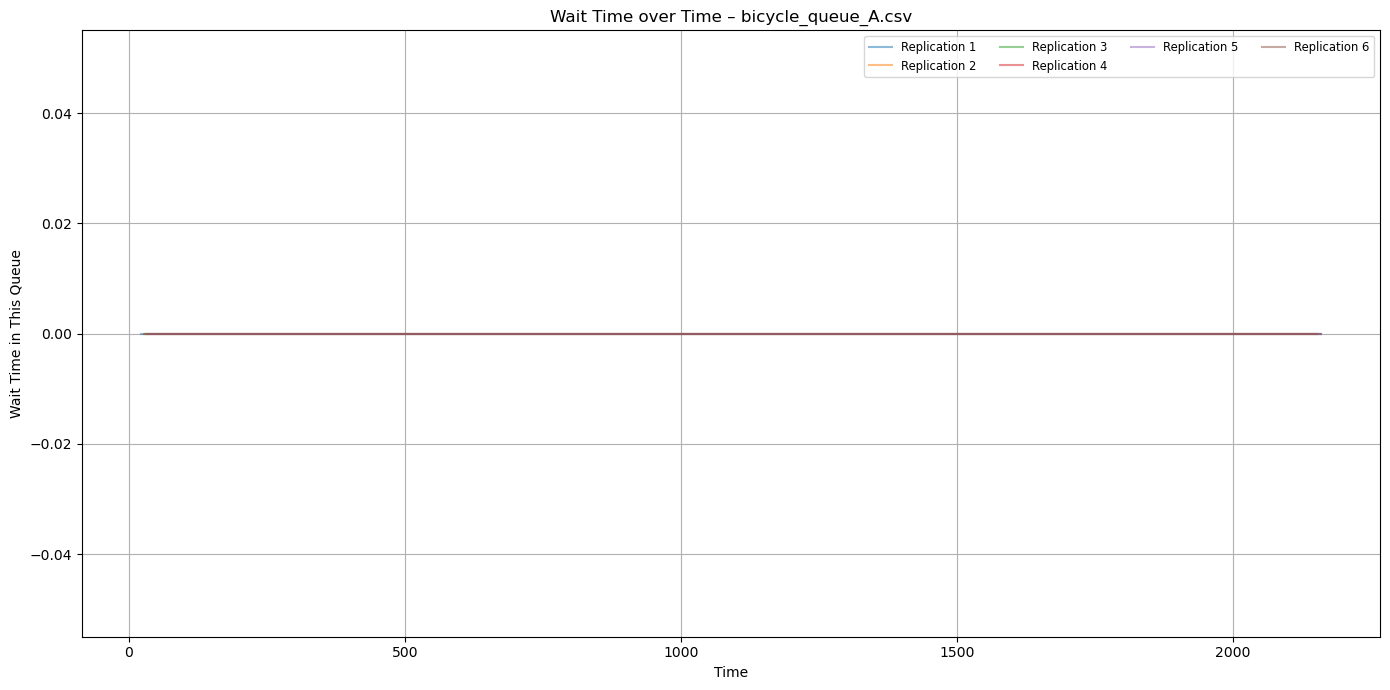

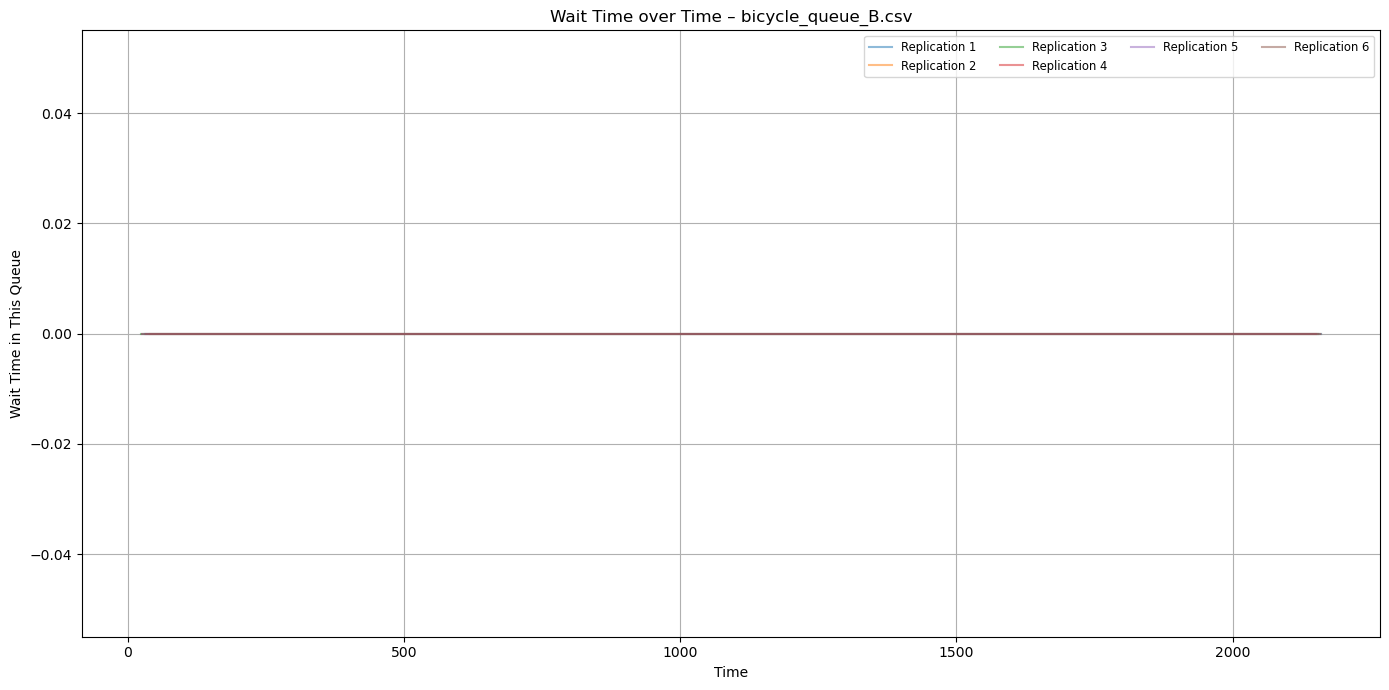

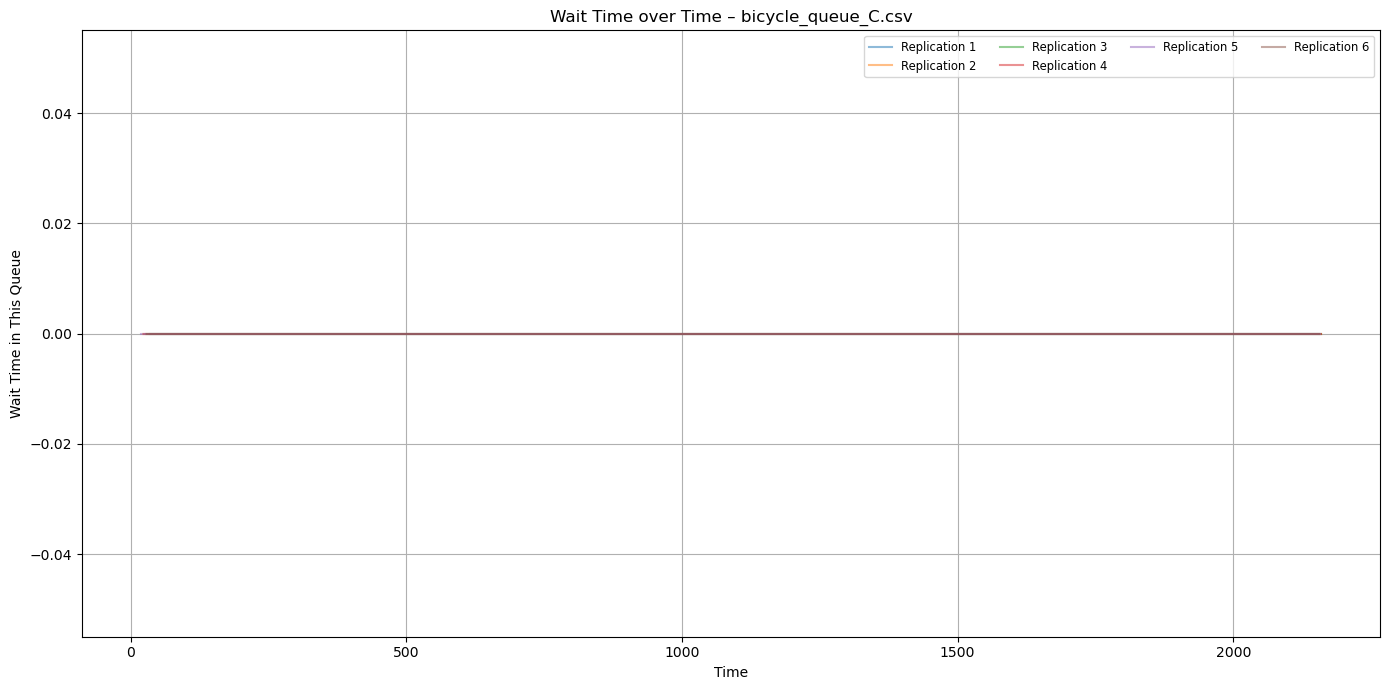

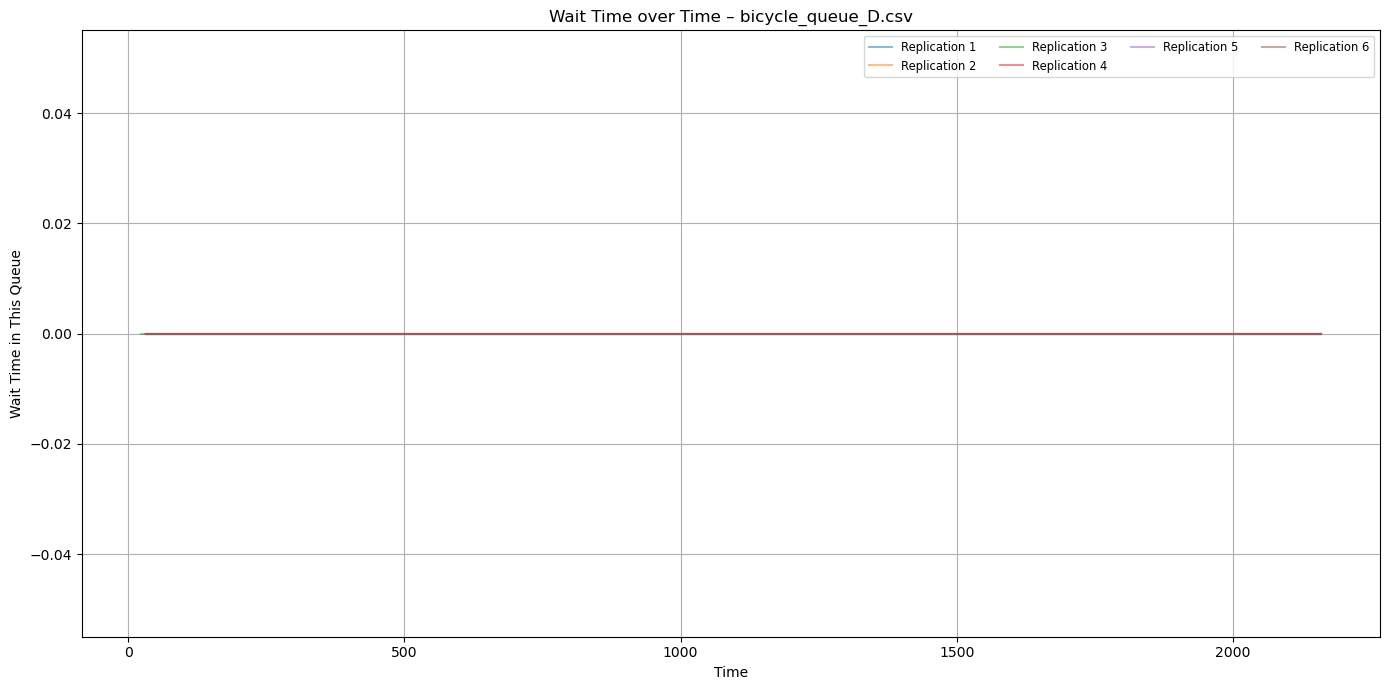

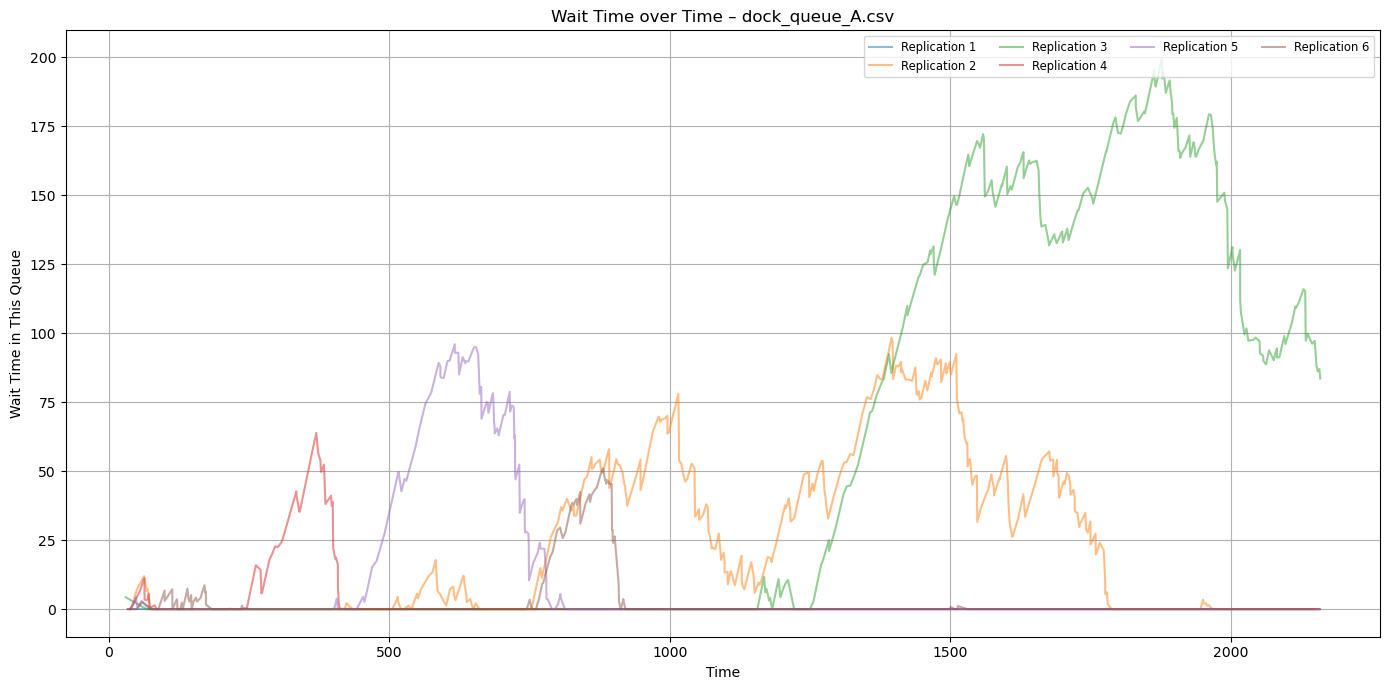

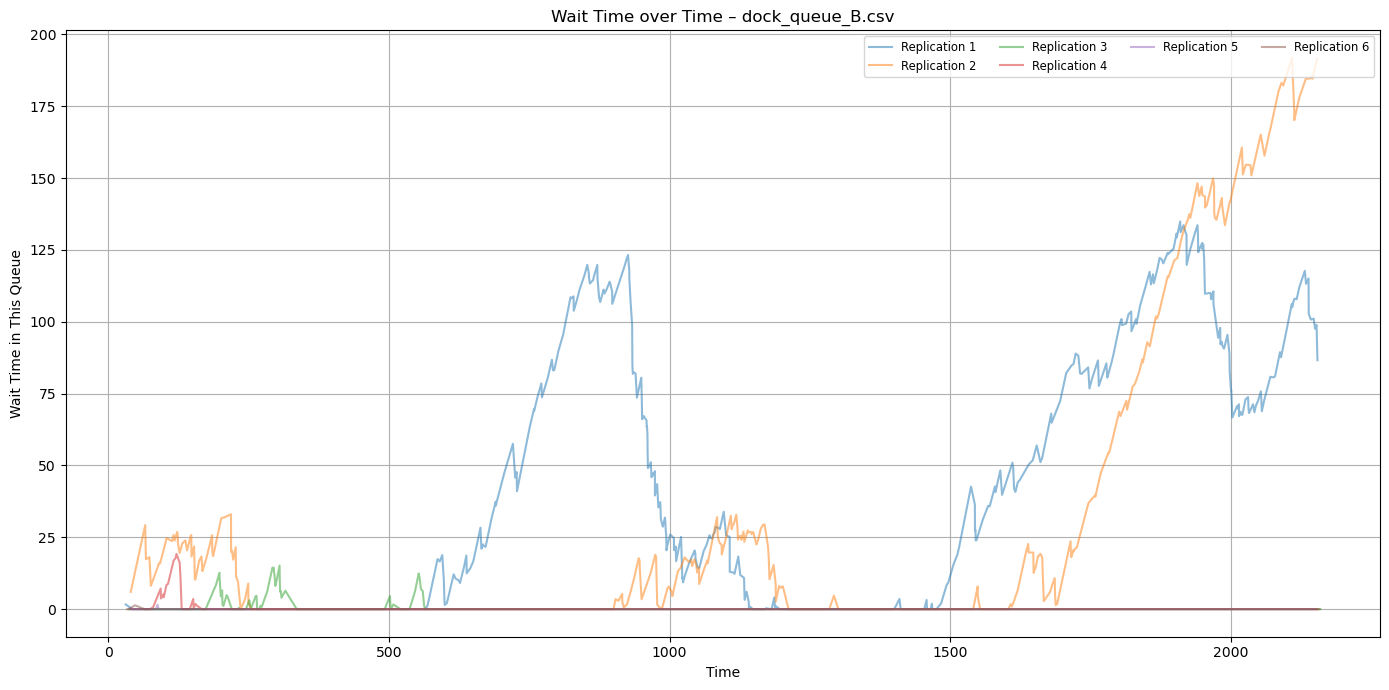

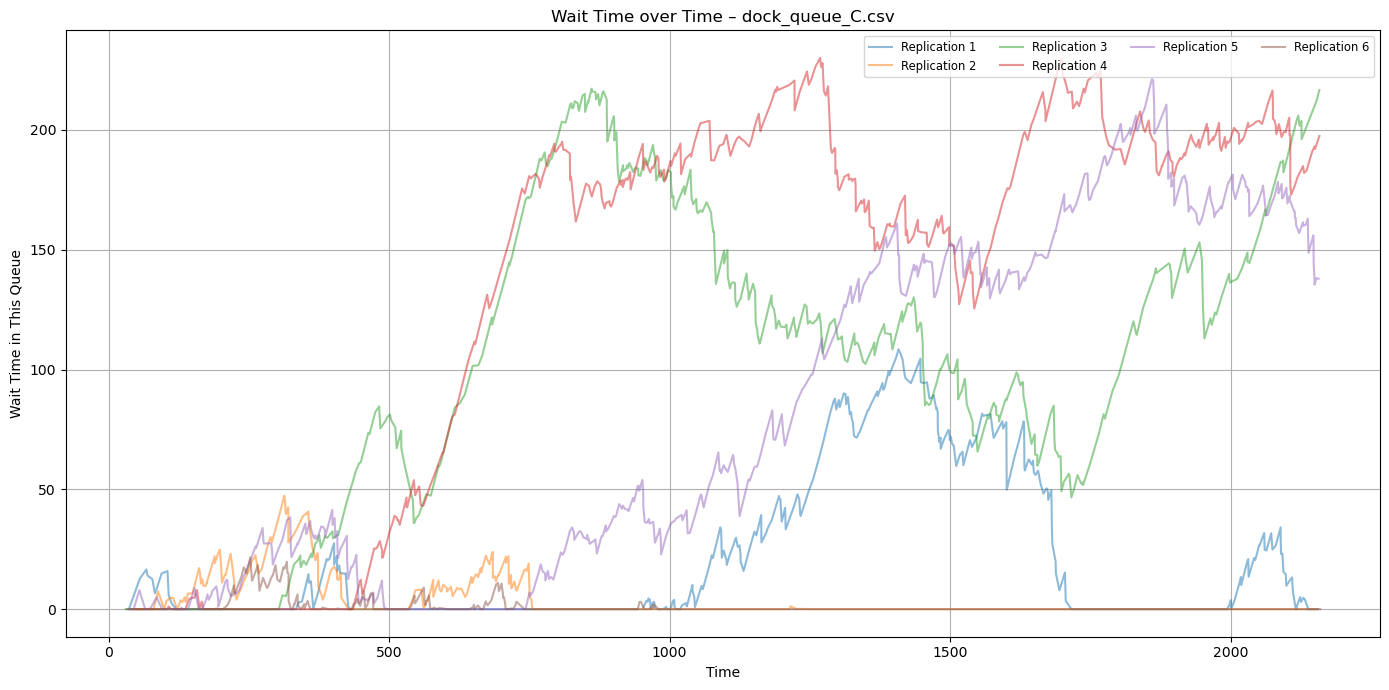

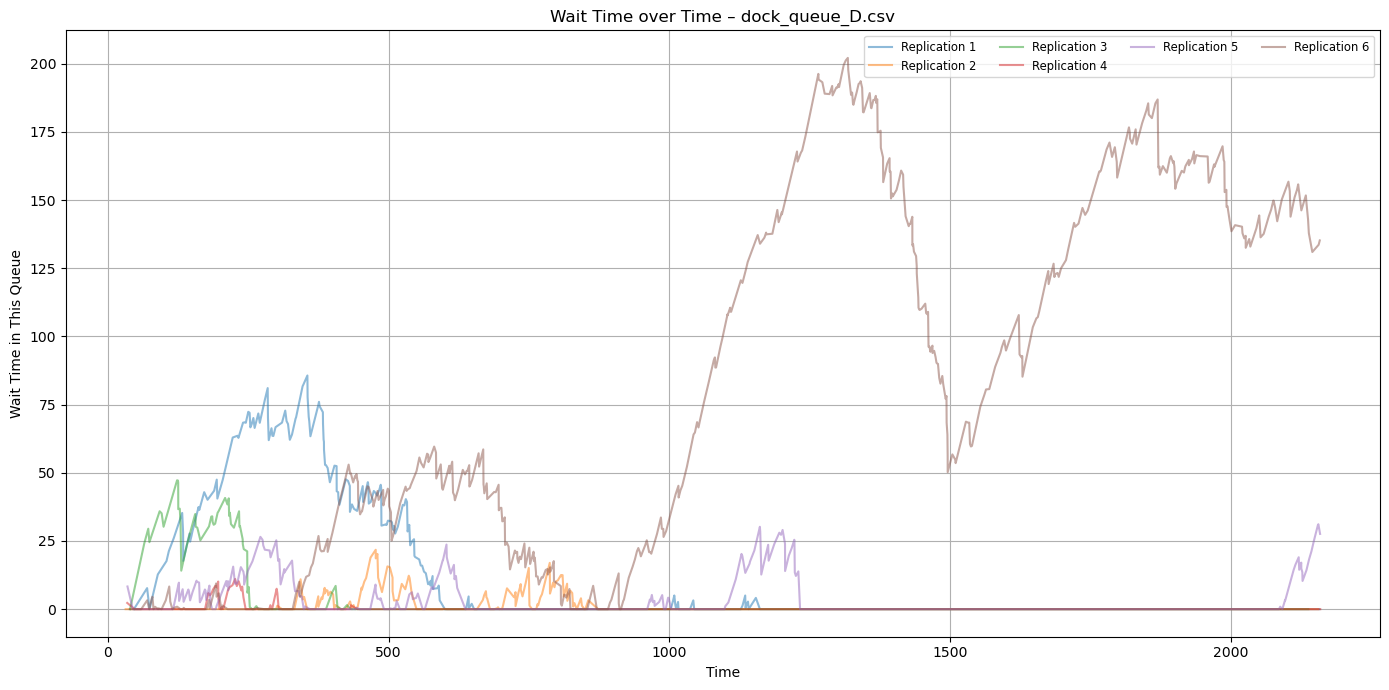

In [4]:
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    
    # Drop unnamed empty columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Compute wait time in this queue
    df["wait_in_this_queue"] = df["curr_WaitTime"] - df["prev_WaitTime"]

    # Get unique replications
    replications = df["replication_no"].unique()

    # Plot
    plt.figure(figsize=(14, 7))
    for rep in replications:
        rep_data = df[df["replication_no"] == rep]
        plt.plot(rep_data["time"], rep_data["wait_in_this_queue"], alpha=0.5, label=f"Replication {rep}")

    plt.xlabel("Time")
    plt.ylabel("Wait Time in This Queue")
    plt.title(f"Wait Time over Time – {file_name}")
    plt.legend(ncol=4, fontsize="small", loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # # Save plot
    # plot_filename = os.path.splitext(file_name)[0] + "_wait_plot.png"
    # plt.savefig(os.path.join(output_path, plot_filename))
    # plt.close()

In [5]:
visits_df = pd.read_csv(os.path.join(folder_path, "visits.csv"))
visits_df

,replication_no,id,visits,source,Unnamed: 4
0,1,10,3,A,NaN
1,1,11,2,B,NaN
2,1,12,4,C,NaN
3,1,13,2,D,NaN
4,1,14,2,B,NaN
...,...,...,...,...,...
4665,6,831,4,A,NaN
4666,6,832,3,D,NaN
4667,6,833,2,A,NaN
4668,6,834,3,D,NaN


In [6]:
visits_df = visits_df.loc[:, ~visits_df.columns.str.contains('^Unnamed')]

### Raw tourists per source across replications

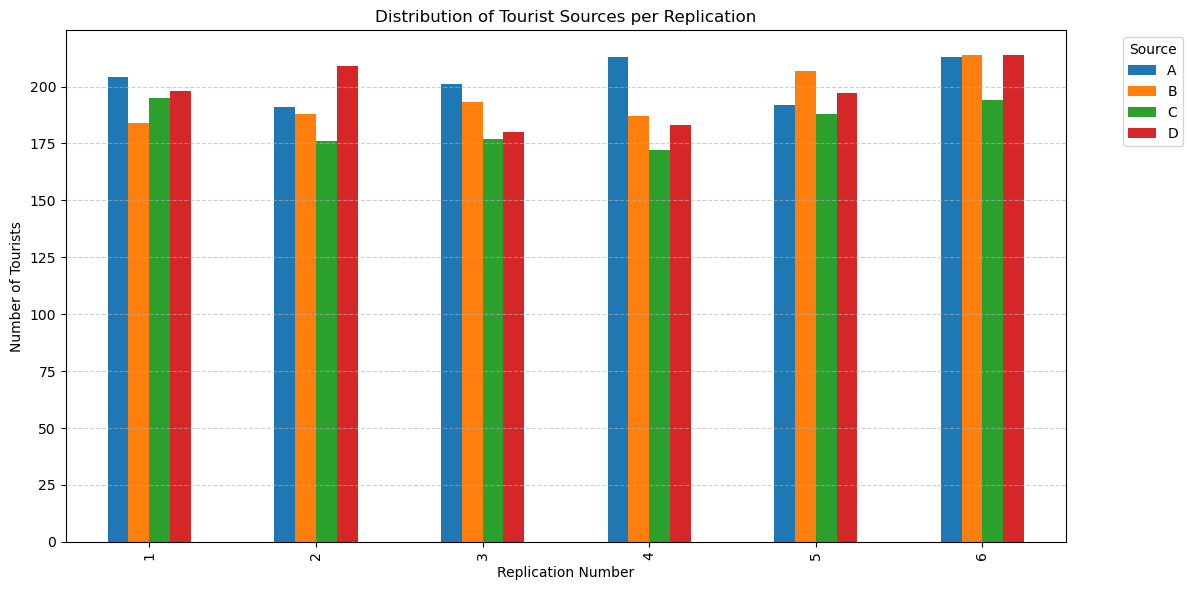

In [13]:
# Group by replication and source, count number of tourists
grouped = visits_df.groupby(["replication_no", "source"]).size().unstack(fill_value=0)

# Plot
grouped.plot(kind="bar", figsize=(12, 6))
plt.xlabel("Replication Number")
plt.ylabel("Number of Tourists")
plt.title("Distribution of Tourist Sources per Replication")
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

In [11]:
source_dist = visits_df.groupby(["replication_no", "source"]).size().unstack(fill_value=0)
normalized_source = source_dist.div(source_dist.sum(axis=1), axis=0)

normalized_source

source,A,B,C,D
replication_no,,,,
1,0.261204,0.235595,0.249680,0.253521
2,0.250000,0.246073,0.230366,0.273560
3,0.267643,0.256991,0.235686,0.239680
4,0.282119,0.247682,0.227815,0.242384
5,0.244898,0.264031,0.239796,0.251276
6,0.255090,0.256287,0.232335,0.256287


### Normalized tourists per source across replications

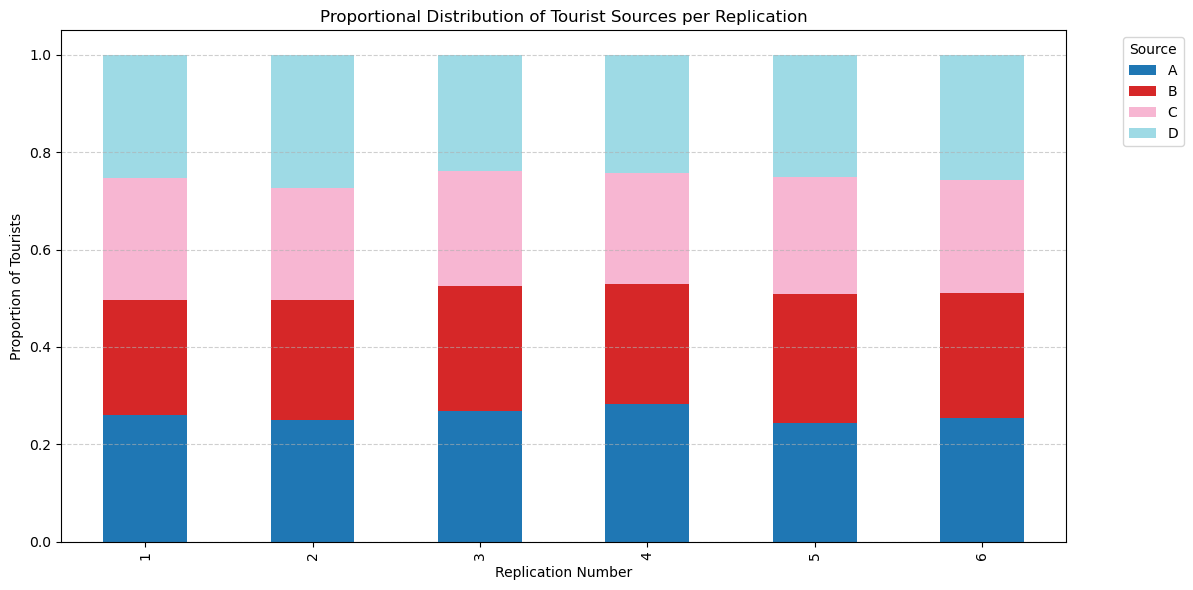

In [12]:
plt.figure(figsize=(12, 6))
normalized_source.plot(kind="bar", stacked=True, colormap="tab20", ax=plt.gca())
plt.xlabel("Replication Number")
plt.ylabel("Proportion of Tourists")
plt.title("Proportional Distribution of Tourist Sources per Replication")
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
visit_counts = visits_df["visits"].value_counts().sort_index()
visit_counts

visits
2    1568
3    1583
4    1519
Name: count, dtype: int64

### Number of visits across replications

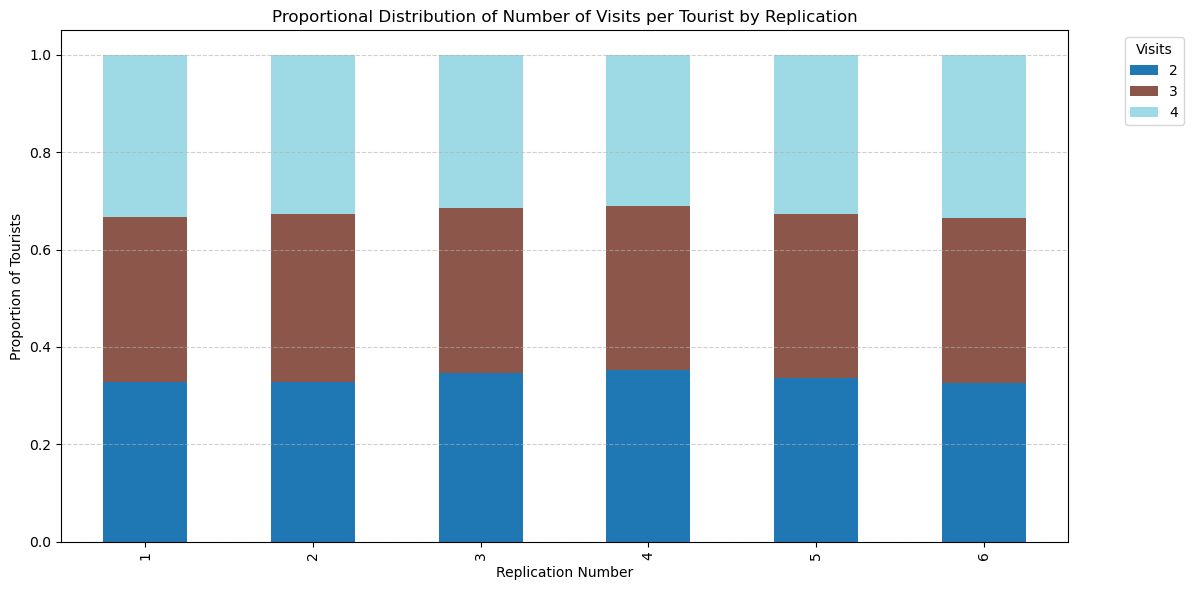

In [9]:
visit_dist = visits_df.groupby(["replication_no", "visits"]).size().unstack(fill_value=0)
normalized_visits = visit_dist.div(visit_dist.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
normalized_visits.plot(kind="bar", stacked=True, colormap="tab20", ax=plt.gca())
plt.xlabel("Replication Number")
plt.ylabel("Proportion of Tourists")
plt.title("Proportional Distribution of Number of Visits per Tourist by Replication")
plt.legend(title="Visits", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()